<h1> Customer Segmentation


<h2> Step 1: Setup

<h3><u> Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

<h3><u> Loading Data


In [3]:
data = pd.read_csv('customer_data.csv', encoding='unicode_escape')
data.drop(columns='Country',inplace= True)
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0


| __Variable__   | __Description__ |
|     :---       |       :---      |      
| __InvoiceNo__  | Code representing each unique transaction.  If this code starts with letter 'c', it indicates a cancellation. |
| __StockCode__  | Unique code foe each distinct product. |
| __Description__| Description of each product. |
| __Quantity__   | The number of units of a product in a transaction. |
| __InvoiceDate__| The date and time of the transaction. |
| __UnitPrice__  | The unit price of the product in pound sterling. |
| __CustomerID__ | Unique ID for each customer. |
| __Country__    | The country of the customer. |

___

<h2> Step 2: Data Analysis

In [3]:
data.info()
initial_datasize = data.shape[0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 28.9+ MB


In [4]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [5]:
data.describe(include='object')

,InvoiceNo,StockCode,Description,InvoiceDate
count,541909,541909,540455,541909
unique,25900,4070,4223,23260
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,10/31/2011 14:41
freq,1114,2313,2369,1114


___

<h2> Step 3: Data Cleaning

<h3><u> Missing Values


In [6]:
#finding columns with missing values
missing_data = data.isnull().sum()
#finding percentage of data having missing values
missing_data_percentage = missing_data[missing_data > 0]/data.shape[0]*100
missing_data_percentage

Description     0.268311
CustomerID     24.926694
dtype: float64

We can observe that there are missing values in customer id and description.

In [7]:
#removing rows with missing data
data = data.dropna()
data.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
94178,544336,21672,WHITE SPOT RED CERAMIC DRAWER KNOB,3,2/17/2011 19:36,1.25,13230.0
44157,540157,35004C,SET OF 3 COLOURED FLYING DUCKS,12,1/5/2011 11:41,4.65,15311.0
155891,550033,22139,RETROSPOT TEA SET CERAMIC 11 PC,1,4/14/2011 11:45,4.95,15005.0
424504,573269,22594,CHRISTMAS GINGHAM TREE,2,10/28/2011 13:00,0.85,16764.0
191114,553316,23084,RABBIT NIGHT LIGHT,6,5/16/2011 12:04,2.08,12682.0
526276,580659,22199,FRYING PAN RED RETROSPOT,4,12/5/2011 13:46,1.25,17811.0
335548,566290,22570,FELTCRAFT CUSHION RABBIT,1,9/11/2011 15:24,3.75,14456.0
319955,564950,22720,SET OF 3 CAKE TINS PANTRY DESIGN,3,8/31/2011 13:31,4.95,17320.0
243253,558441,22171,3 HOOK PHOTO SHELF ANTIQUE WHITE,1,6/29/2011 12:59,8.50,14606.0
66800,541816,37467,PIG MUG IN TWO COLOUR DESIGNS,8,1/21/2011 15:56,0.85,17799.0


In [8]:
missing_data = data.isnull().sum()
missing_data

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
dtype: int64

<h3><u> Duplicate Values


In [9]:
#checking for duplicate data
duplicate_data = data[data.duplicated()]
duplicate_data.sort_values(by='StockCode')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
139262,548309,10120,DOGGY RUBBER,1,3/30/2011 12:02,0.21,16657.0
248503,558860,10125,MINI FUNKY DESIGN TAPES,1,7/4/2011 12:18,0.85,17975.0
239419,558049,10133,COLOURING PENCILS BROWN TUBE,1,6/24/2011 14:16,0.42,15850.0
308705,564049,10133,COLOURING PENCILS BROWN TUBE,10,8/22/2011 13:30,0.42,17585.0
396055,571054,10135,COLOURING PENCILS BROWN TUBE,1,10/13/2011 13:58,1.25,14234.0
...,...,...,...,...,...,...,...
414140,572344,M,Manual,48,10/24/2011 10:43,1.50,14607.0
414141,572344,M,Manual,48,10/24/2011 10:43,1.50,14607.0
414142,572344,M,Manual,48,10/24/2011 10:43,1.50,14607.0
414143,572344,M,Manual,48,10/24/2011 10:43,1.50,14607.0


In [10]:
#drop duplicate rows
data.drop_duplicates(inplace= True)
print('Numbr of rows left =', data.shape[0])
data.head(10)

Numbr of rows left = 401604


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0


<h3><u> Anomalous Stock Codes


In [11]:
#checking for anomalous stock codes
unique_stockcode = data['StockCode'].unique()
numeric_count = [sum(char.isdigit() for char in str(code)) for code in unique_stockcode]
numeric_char_count= Counter(numeric_count)
print(numeric_char_count)

Counter({5: 3676, 0: 7, 1: 1})


In [12]:
anomalous_stock_codes = [code for code in unique_stockcode if sum(c.isdigit() for c in str(code)) in (0, 1)]
print(anomalous_stock_codes)

['POST', 'D', 'C2', 'M', 'BANK CHARGES', 'PADS', 'DOT', 'CRUK']


In [13]:
#removing anamolous stock codes
data = data[~data['StockCode'].isin(anomalous_stock_codes)]

service_related_descriptions = ["Next Day Carriage", "High Resolution Image"]
data = data[~data['Description'].isin(service_related_descriptions)]

print(f'Size of data = {data.shape[0]}')
data.head(10)

Size of data = 399606


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0


<h3><u> Zero Unit Price(Free Items)


In [14]:
#checking transactions with zero unit price
data[data['UnitPrice'] == 0].describe()[['Quantity']]

,Quantity
count,33.000000
mean,420.515152
std,2176.713608
min,1.000000
25%,2.000000
50%,11.000000
75%,36.000000
max,12540.000000


In [15]:
#removing these transactions
data = data[data['UnitPrice'] != 0]
data.reset_index(drop=True, inplace=True)
print(f'Size of data = {data.shape[0]}')
data.head(10)


Size of data = 399573


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0


In [16]:
#checking how much data is retained after cleaning
percent_data_retained = data.shape[0]/initial_datasize*100
print(f'Percentage of data retained after cleaning is {percent_data_retained:.2f}%')

Percentage of data retained after cleaning is 73.73%


___

<h2> Step 4: Feature Engineering

In [17]:
#Converting CustomerID to string
data['CustomerID'] = data['CustomerID'].astype(str)

<h3><u> Cancelled Transactions


In [18]:
#Checking Cancelled Transactions
data['Status'] = ['Cancelled' if str(invoice).startswith('C') else 'Completed' for invoice in data['InvoiceNo']]
cancelled_data = data[data['Status'] == 'Cancelled']
cancelled_data.sample(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Status
55791,C543818,85071B,RED CHARLIE+LOLA PERSONAL DOORSIGN,-2,2/13/2011 15:45,2.95,16897.0,Cancelled
186382,C560220,22423,REGENCY CAKESTAND 3 TIER,-1,7/15/2011 15:22,12.75,14572.0,Cancelled


In [19]:
cancelled_data.describe()

,Quantity,UnitPrice
count,8505.000000,8505.000000
mean,-31.476778,4.438907
std,1197.121933,9.198968
min,-80995.000000,0.030000
25%,-6.000000,1.450000
50%,-2.000000,2.550000
75%,-1.000000,4.950000
max,-1.000000,295.000000


<h3><u> Last Purchase (Recency)



In [20]:
#Finding the number of days since last purchase
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
customer_data = data.groupby('CustomerID')['InvoiceDate'].max().reset_index()
customer_data.rename(columns={'InvoiceDate': 'Most_Recent_Purchase'}, inplace=True)

most_recent_date = data['InvoiceDate'].max() #most recent date in the entire data

customer_data['Days_Since_Last_Purchase'] = (most_recent_date - customer_data['Most_Recent_Purchase']).dt.days
customer_data.drop(columns=['Most_Recent_Purchase'], inplace=True)
customer_data.head(5)


,CustomerID,Days_Since_Last_Purchase
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


<h3><u> Total Transactions and Products (Frequency)



In [21]:
customer_transactiondata = data.groupby('CustomerID').agg(
    Total_Transactions=('InvoiceNo', 'nunique'),
    Total_Products_Purchased=('Quantity', 'sum'),
    Unique_Products_Purchased=('StockCode','nunique')
).reset_index()

customer_data = pd.merge(customer_data,customer_transactiondata, on='CustomerID')
customer_data.head(5)

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Unique_Products_Purchased
0,12346.0,325,2,0,1
1,12347.0,1,7,2458,103
2,12348.0,74,4,2332,21
3,12349.0,18,1,630,72
4,12350.0,309,1,196,16


<h3><u> Total Spend and Average Transaction Value (Monetary)



In [22]:
#Total spend
data['Total_Spend'] = data['UnitPrice']*data['Quantity']
TotalSpend = data.groupby('CustomerID')['Total_Spend'].sum().reset_index()
customer_data = pd.merge(customer_data,TotalSpend, on = 'CustomerID')

#Average Transaction Value
customer_data['Average_Transaction_Value'] = customer_data['Total_Spend']/customer_data['Total_Transactions']
customer_data.head(5)

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Unique_Products_Purchased,Total_Spend,Average_Transaction_Value
0,12346.0,325,2,0,1,0.00,0.000000
1,12347.0,1,7,2458,103,4310.00,615.714286
2,12348.0,74,4,2332,21,1437.24,359.310000
3,12349.0,18,1,630,72,1457.55,1457.550000
4,12350.0,309,1,196,16,294.40,294.400000


<h3><u> Behavorial Features



In [23]:
#Average Days Between Purchases
data = data.sort_values(by=['CustomerID', 'InvoiceDate'])
data['Days_Between_Purchases'] = data.groupby('CustomerID')['InvoiceDate'].diff().dt.days

average_days_between_purchases = data.groupby('CustomerID')['Days_Between_Purchases'].mean().reset_index()
customer_data = pd.merge(customer_data,average_days_between_purchases, on = 'CustomerID')
customer_data.rename(columns={'Days_Between_Purchases':'Average_Days_Between_Purchase'},inplace=True)
customer_data.fillna({'Average_Days_Between_Purchase':0}, inplace= True)

#Day and Hour
data['Day_Of_Week'] = data['InvoiceDate'].dt.dayofweek
data['Hour'] = data['InvoiceDate'].dt.hour

#Favorite Day and Hour
favorite_shopping_day = data.groupby('CustomerID')['Day_Of_Week'].agg(lambda x: x.mode()[0]).reset_index()
favorite_shopping_hour = data.groupby('CustomerID')['Hour'].agg(lambda x: x.mode()[0]).reset_index()
customer_data = pd.merge(customer_data,favorite_shopping_day, on = 'CustomerID')
customer_data = pd.merge(customer_data,favorite_shopping_hour, on = 'CustomerID')
customer_data.rename(columns={'Day_Of_Week': 'Favorite_Day','Hour' : 'Favorite_Hour'}, inplace=True)


In [24]:
customer_data.head(5)

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Unique_Products_Purchased,Total_Spend,Average_Transaction_Value,Average_Days_Between_Purchase,Favorite_Day,Favorite_Hour
0,12346.0,325,2,0,1,0.00,0.000000,0.000000,1,10
1,12347.0,1,7,2458,103,4310.00,615.714286,2.000000,1,14
2,12348.0,74,4,2332,21,1437.24,359.310000,10.846154,3,19
3,12349.0,18,1,630,72,1457.55,1457.550000,0.000000,0,9
4,12350.0,309,1,196,16,294.40,294.400000,0.000000,2,16


<h3><u> Cancellation Trends

In [25]:
#Cancellation Frequency
cancellation_frequency = cancelled_data.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
cancellation_frequency.rename(columns={'InvoiceNo': 'Cancellation_Frequency'}, inplace=True)
customer_data = pd.merge(customer_data, cancellation_frequency, on='CustomerID', how='left')
customer_data.fillna({'Cancellation_Frequency':0}, inplace= True) #Customers who have not cancelled any order

#Cancellation Rate
customer_data['Cancellation_Rate'] = customer_data['Cancellation_Frequency'] /customer_data['Total_Transactions']

In [26]:
customer_data = customer_data.convert_dtypes()
customer_data.head(10)

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Unique_Products_Purchased,Total_Spend,Average_Transaction_Value,Average_Days_Between_Purchase,Favorite_Day,Favorite_Hour,Cancellation_Frequency,Cancellation_Rate
0,12346.0,325,2,0,1,0.0,0.0,0.0,1,10,1,0.5
1,12347.0,1,7,2458,103,4310.0,615.714286,2.0,1,14,0,0.0
2,12348.0,74,4,2332,21,1437.24,359.31,10.846154,3,19,0,0.0
3,12349.0,18,1,630,72,1457.55,1457.55,0.0,0,9,0,0.0
4,12350.0,309,1,196,16,294.4,294.4,0.0,2,16,0,0.0
5,12352.0,35,8,463,57,1265.41,158.17625,3.108434,1,14,1,0.125
6,12353.0,203,1,20,4,89.0,89.0,0.0,3,17,0,0.0
7,12354.0,231,1,530,58,1079.4,1079.4,0.0,3,13,0,0.0
8,12355.0,213,1,240,13,459.4,459.4,0.0,0,13,0,0.0
9,12356.0,22,3,1573,52,2487.43,829.143333,5.298246,1,9,0,0.0


In [27]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4362 entries, 0 to 4361
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CustomerID                     4362 non-null   string 
 1   Days_Since_Last_Purchase       4362 non-null   Int64  
 2   Total_Transactions             4362 non-null   Int64  
 3   Total_Products_Purchased       4362 non-null   Int64  
 4   Unique_Products_Purchased      4362 non-null   Int64  
 5   Total_Spend                    4362 non-null   Float64
 6   Average_Transaction_Value      4362 non-null   Float64
 7   Average_Days_Between_Purchase  4362 non-null   Float64
 8   Favorite_Day                   4362 non-null   Int32  
 9   Favorite_Hour                  4362 non-null   Int32  
 10  Cancellation_Frequency         4362 non-null   Int64  
 11  Cancellation_Rate              4362 non-null   Float64
dtypes: Float64(4), Int32(2), Int64(5), string(1)
mem

---

<h2> Step 5: Outlier Detection

<Figure size 640x480 with 0 Axes>

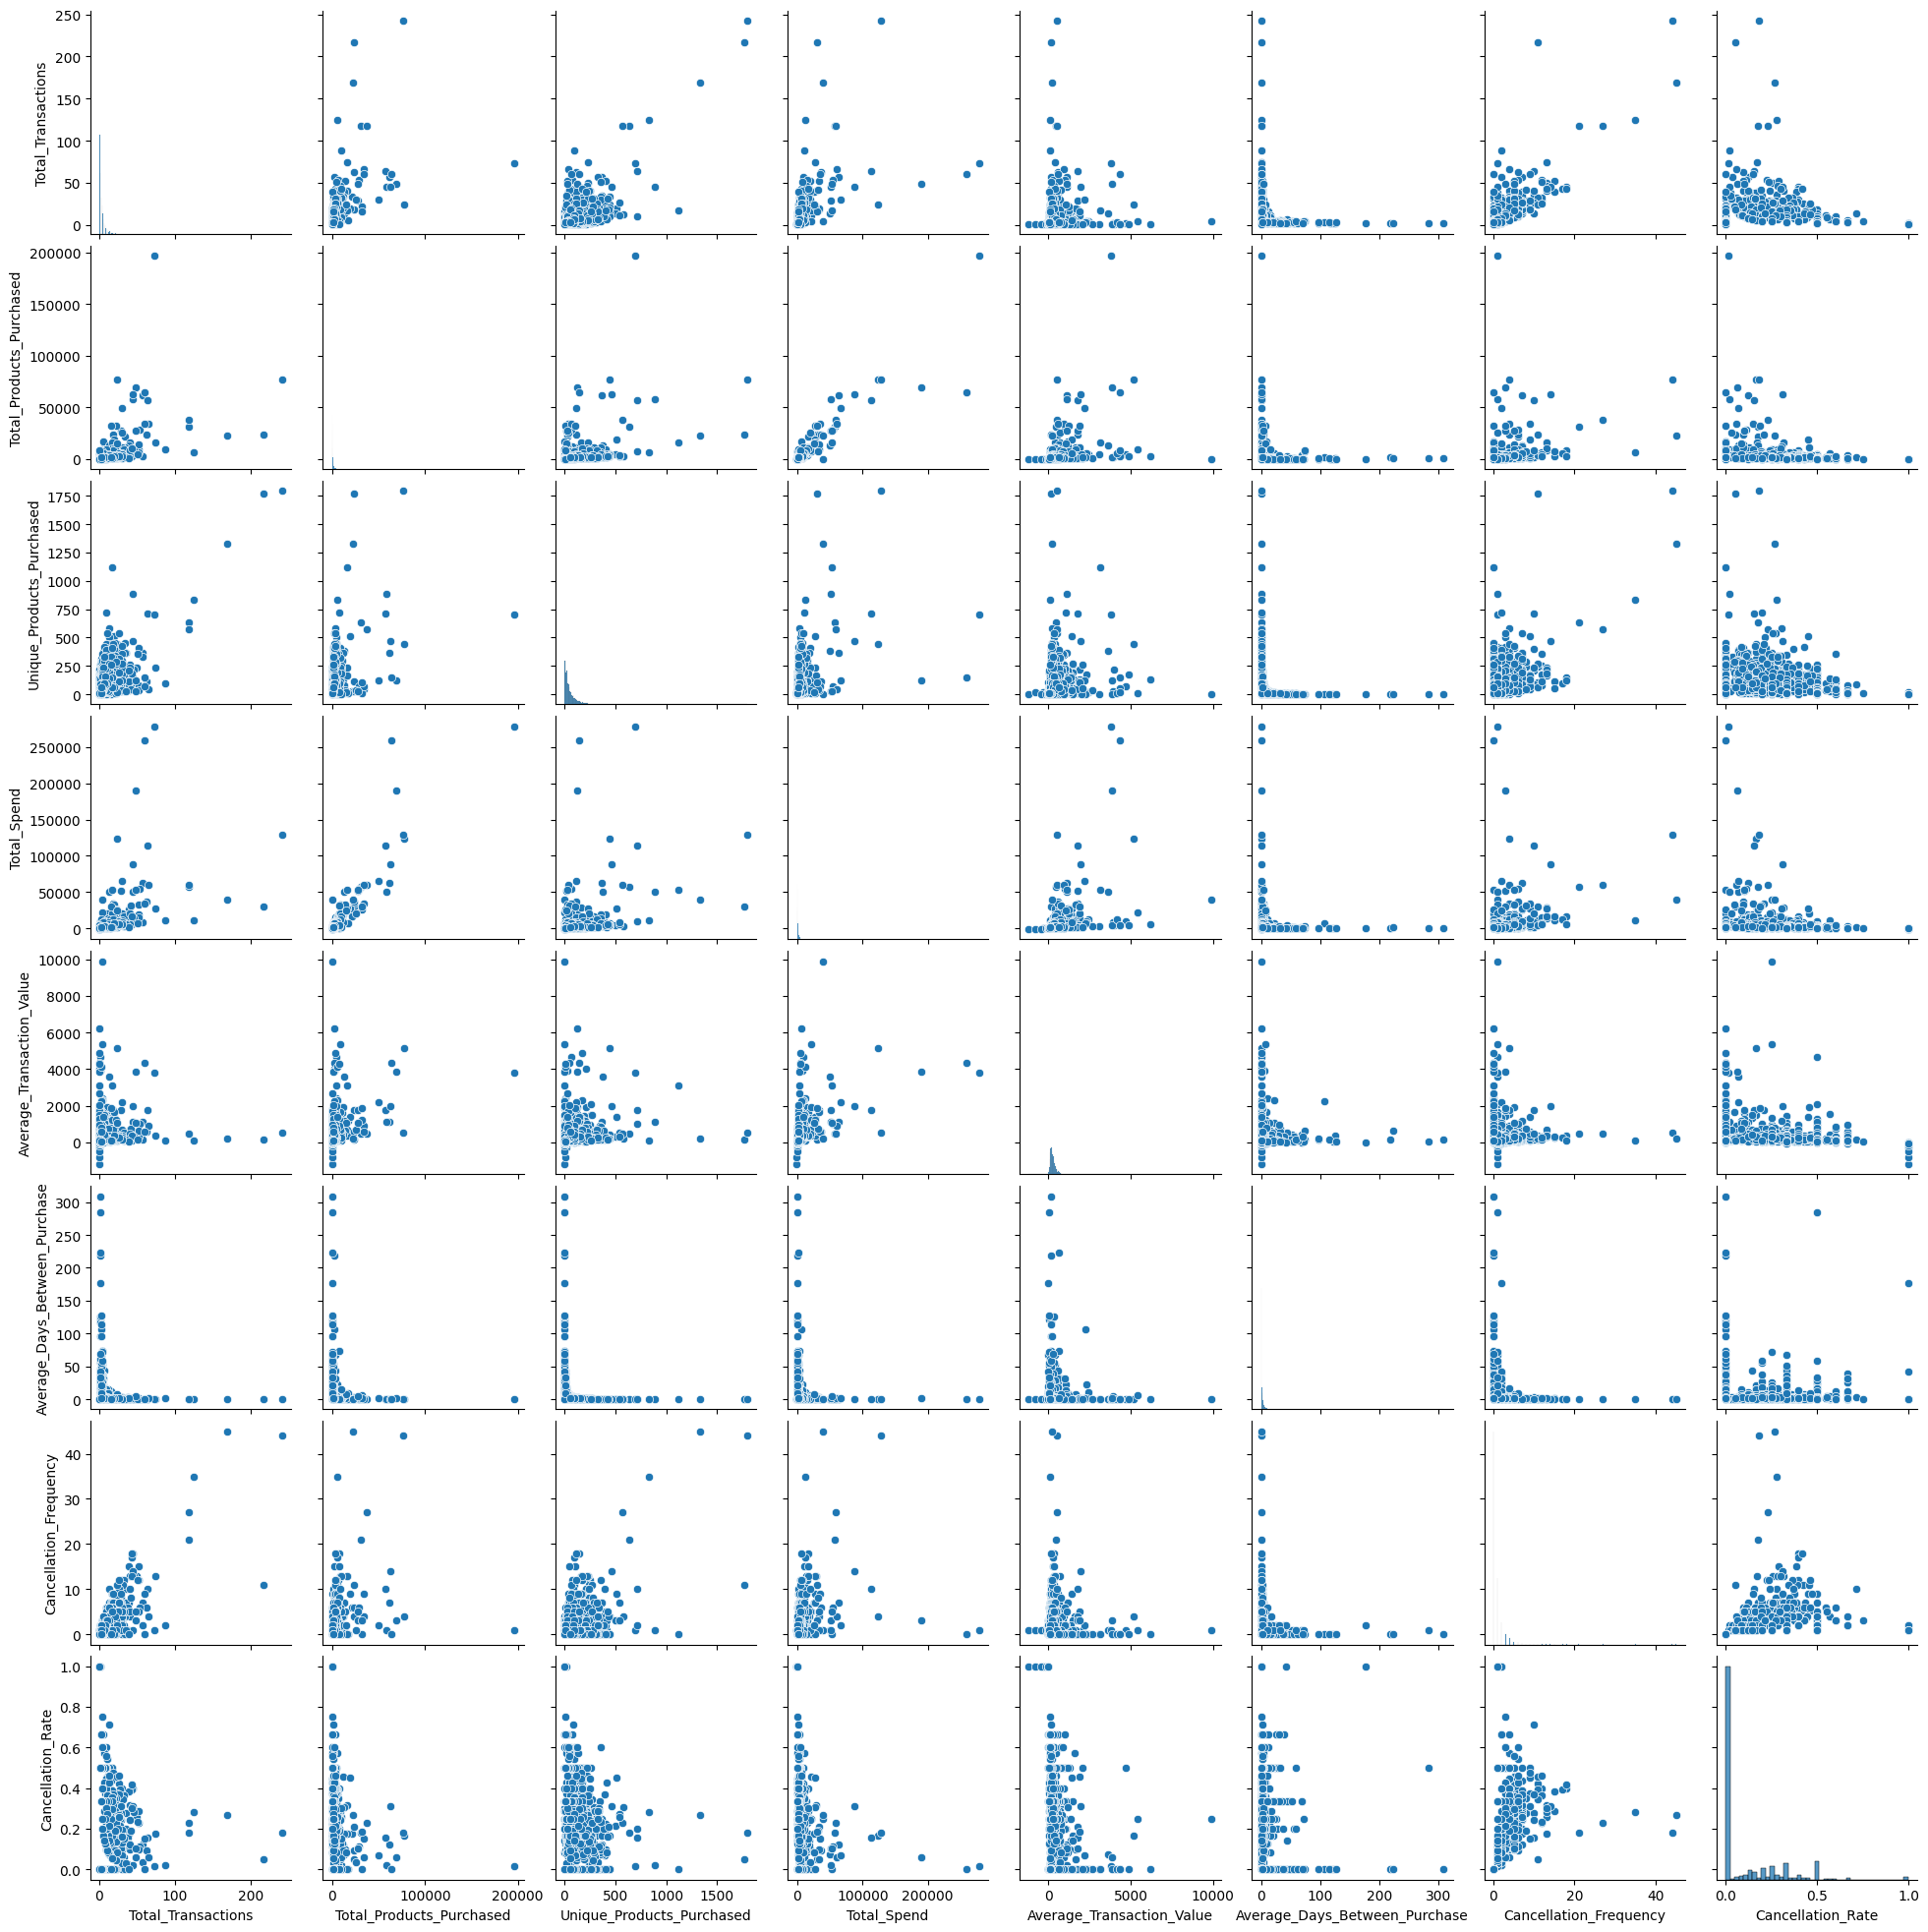

In [28]:
#Pair plot for selected columns
To_Plot = ['Total_Transactions',
       'Total_Products_Purchased', 'Unique_Products_Purchased', 'Total_Spend',
       'Average_Transaction_Value', 'Average_Days_Between_Purchase',
       'Cancellation_Frequency','Cancellation_Rate']
plt.figure()
sns.pairplot(customer_data[To_Plot])
plt.show()

In [29]:
#Removing Outliers
customer_data_cleaned = customer_data.copy()
customer_data_cleaned = customer_data_cleaned[(customer_data_cleaned['Total_Transactions']<50)]
customer_data_cleaned = customer_data_cleaned[(customer_data_cleaned['Total_Products_Purchased']<15000)]
customer_data_cleaned = customer_data_cleaned[(customer_data_cleaned['Unique_Products_Purchased']<500)]
customer_data_cleaned = customer_data_cleaned[(customer_data_cleaned['Total_Spend']<25000)]
customer_data_cleaned = customer_data_cleaned[(customer_data_cleaned['Average_Transaction_Value']<2400)]
customer_data_cleaned = customer_data_cleaned[(customer_data_cleaned['Average_Days_Between_Purchase']<30)]
customer_data_cleaned = customer_data_cleaned[(customer_data_cleaned['Cancellation_Frequency']<15)]
customer_data_cleaned = customer_data_cleaned[(customer_data_cleaned['Cancellation_Rate']<0.9)]

outliers_data = customer_data.drop(customer_data_cleaned.index)
outliers_percent = outliers_data.shape[0]/customer_data.shape[0]*100


<Figure size 640x480 with 0 Axes>

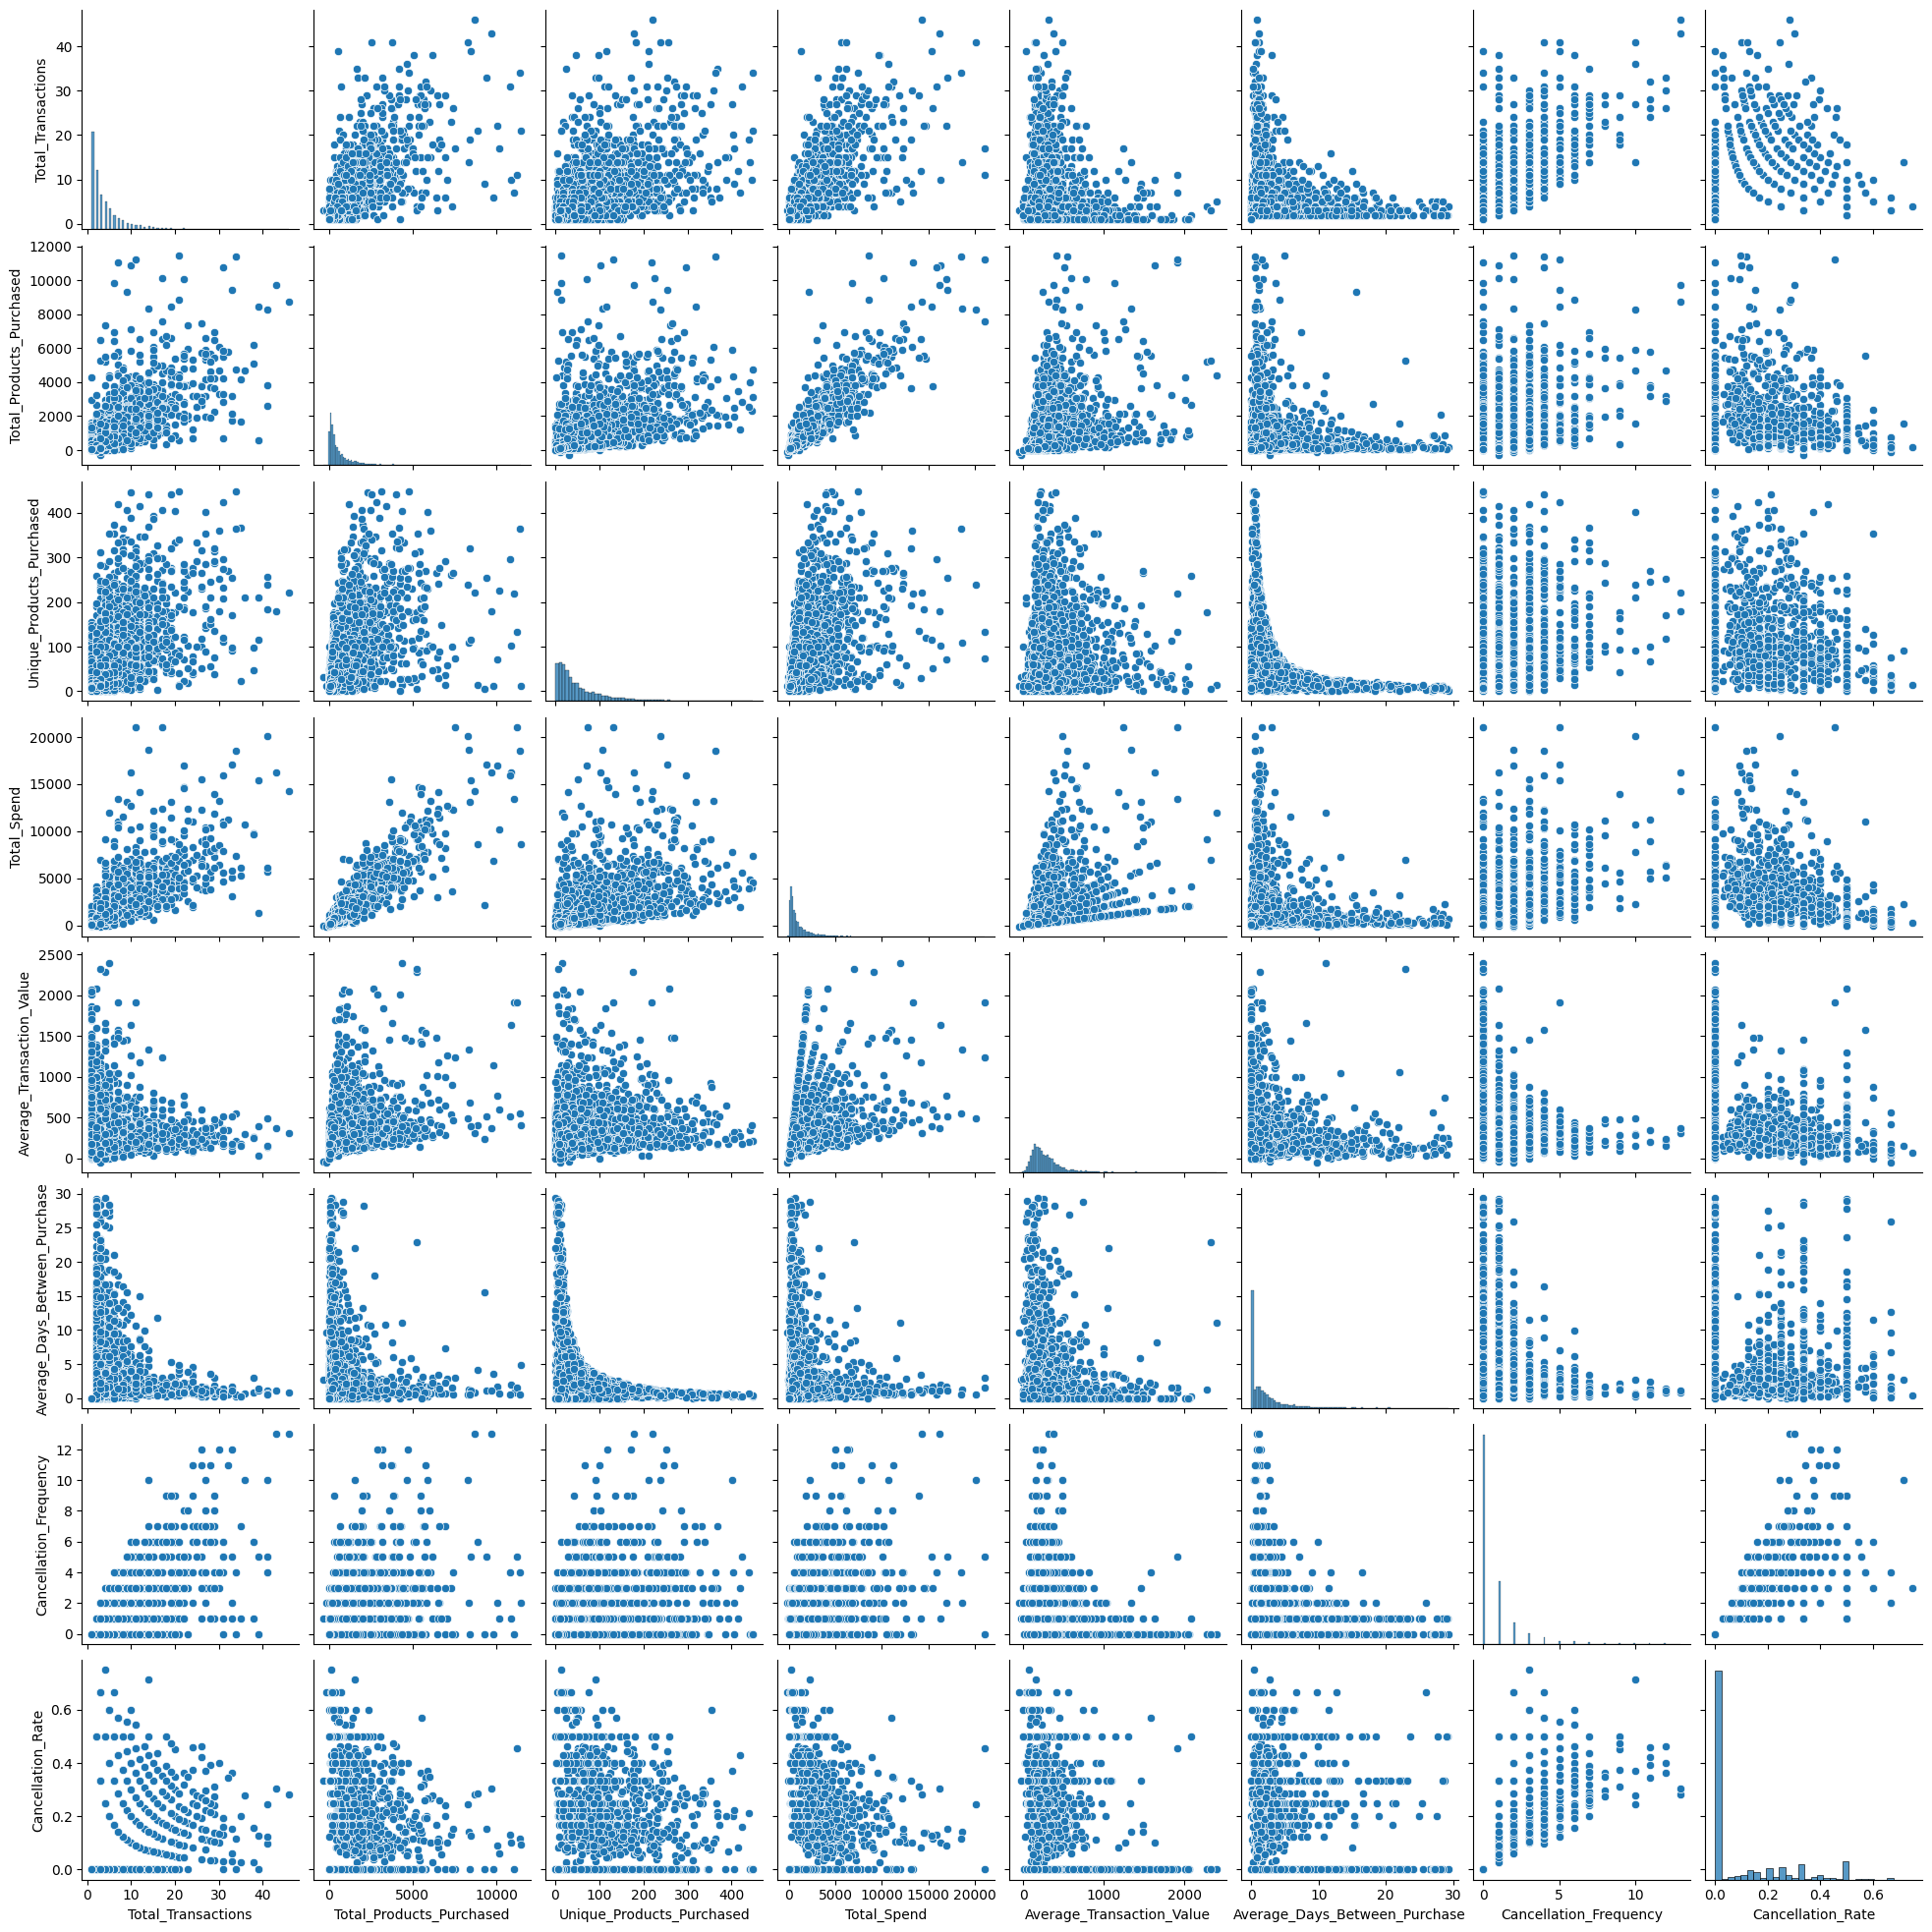

In [30]:
plt.figure()
sns.pairplot(customer_data_cleaned[To_Plot])
plt.show()

In [31]:
print(f'Percentage of data removed as outliers {outliers_percent:.2f}')
print('Rows in final data', customer_data_cleaned.shape[0])
customer_data_cleaned.head(10)

Percentage of data removed as outliers 3.58
Rows in final data 4206


,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Unique_Products_Purchased,Total_Spend,Average_Transaction_Value,Average_Days_Between_Purchase,Favorite_Day,Favorite_Hour,Cancellation_Frequency,Cancellation_Rate
0,12346.0,325,2,0,1,0.0,0.0,0.0,1,10,1,0.5
1,12347.0,1,7,2458,103,4310.0,615.714286,2.0,1,14,0,0.0
2,12348.0,74,4,2332,21,1437.24,359.31,10.846154,3,19,0,0.0
3,12349.0,18,1,630,72,1457.55,1457.55,0.0,0,9,0,0.0
4,12350.0,309,1,196,16,294.4,294.4,0.0,2,16,0,0.0
5,12352.0,35,8,463,57,1265.41,158.17625,3.108434,1,14,1,0.125
6,12353.0,203,1,20,4,89.0,89.0,0.0,3,17,0,0.0
7,12354.0,231,1,530,58,1079.4,1079.4,0.0,3,13,0,0.0
8,12355.0,213,1,240,13,459.4,459.4,0.0,0,13,0,0.0
9,12356.0,22,3,1573,52,2487.43,829.143333,5.298246,1,9,0,0.0


---

<h2> Step 6: Feature Scaling

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
columns_to_scale = ['Days_Since_Last_Purchase','Total_Transactions',
       'Total_Products_Purchased', 'Unique_Products_Purchased', 'Total_Spend',
       'Average_Transaction_Value', 'Average_Days_Between_Purchase',
       'Cancellation_Frequency','Cancellation_Rate', 'Favorite_Hour'] # Exclude Favorite_Day as it is a categorical feature

customer_data_scaled = customer_data_cleaned.copy()
customer_data_scaled[columns_to_scale] = scaler.fit_transform(customer_data_scaled[columns_to_scale])
customer_data_scaled.head(10)

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Unique_Products_Purchased,Total_Spend,Average_Transaction_Value,Average_Days_Between_Purchase,Favorite_Day,Favorite_Hour,Cancellation_Frequency,Cancellation_Rate
0,12346.0,2.341407,-0.468923,-0.669259,-0.890461,-0.672002,-1.229415,-0.614623,1,-1.086927,0.238482,2.459490
1,12347.0,-0.899849,0.494204,1.407500,0.685198,1.511783,1.285191,-0.105842,1,0.649020,-0.496895,-0.616312
2,12348.0,-0.169566,-0.083673,1.301043,-0.581508,0.056217,0.238024,2.144538,3,2.818954,-0.496895,-0.616312
3,12349.0,-0.729784,-0.661549,-0.136973,0.206321,0.066508,4.723288,-0.614623,0,-1.520914,-0.496895,-0.616312
4,12350.0,2.181345,-0.661549,-0.503659,-0.658747,-0.522835,-0.027071,-0.614623,2,1.516993,-0.496895,-0.616312
5,12352.0,-0.559718,0.686829,-0.278071,-0.025393,-0.030845,-0.583415,0.176134,1,0.649020,0.238482,0.152638
6,12353.0,1.120934,-0.661549,-0.652361,-0.844118,-0.626907,-0.865934,-0.614623,3,1.950980,-0.496895,-0.616312
7,12354.0,1.401042,-0.661549,-0.221463,-0.009946,-0.125093,3.178905,-0.614623,3,0.215033,-0.496895,-0.616312
8,12355.0,1.220973,-0.661549,-0.466483,-0.705089,-0.439233,0.646796,-0.614623,0,0.215033,-0.496895,-0.616312
9,12356.0,-0.689768,-0.276298,0.659765,-0.102632,0.588326,2.156846,0.733201,1,-1.520914,-0.496895,-0.616312


In [33]:
customer_data_scaled.set_index('CustomerID', inplace=True)

In [34]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(customer_data_scaled)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

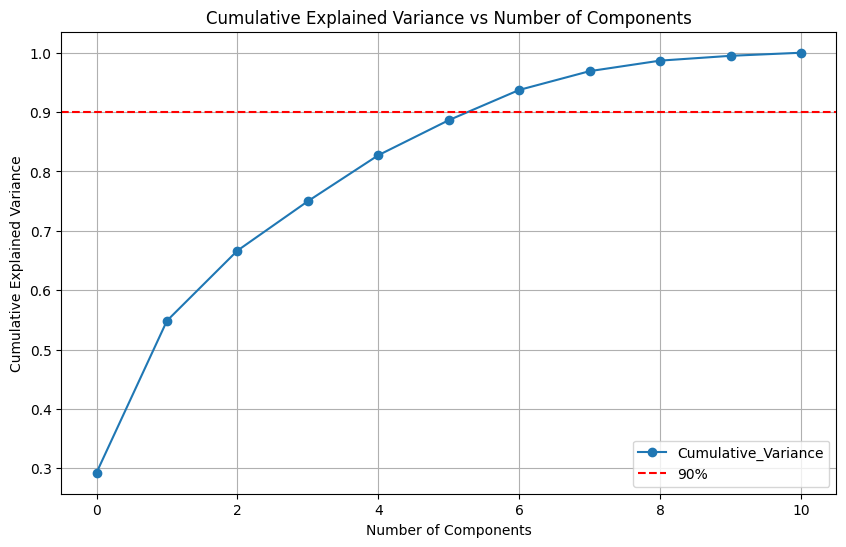

In [35]:
plt.figure(figsize=(10, 6))
plt.plot(cumulative_explained_variance, marker='o', label = 'Cumulative_Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs Number of Components')
plt.grid(True)
plt.axhline(y=0.90, color ='r', linestyle='--', label = '90%')
plt.legend(loc = 'lower right')
plt.show()

5 components explain about 90% of the variance <br>
Therefore we will carry out PCA with 5 components

In [36]:
pca = PCA(n_components=5)
customer_data_pca = pca.fit_transform(customer_data_scaled)
customer_data_pca = pd.DataFrame(customer_data_pca, columns= ['PC'+str(i+1) for i in range(5)])
customer_data_pca.index = customer_data_scaled.index
customer_data_pca.head()

,PC1,PC2,PC3,PC4,PC5
CustomerID,,,,,
12346.0,-1.066468,-1.853286,-2.183316,-2.265952,-1.719329
12347.0,2.023844,-1.233368,1.970200,0.617327,0.765270
12348.0,-0.037808,0.515525,0.281138,1.643614,2.253125
12349.0,0.646907,-2.600446,3.522288,0.538497,-1.776576
12350.0,-1.798745,-0.670223,0.619698,-1.598327,0.781151


---

In [37]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

wcss = []
silhouette_scores =[]
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0, n_init=10, max_iter=100)
    kmeans.fit(customer_data_pca)
    score = silhouette_score(customer_data_pca, kmeans.labels_)
    silhouette_scores.append(score)
    wcss.append(kmeans.inertia_)

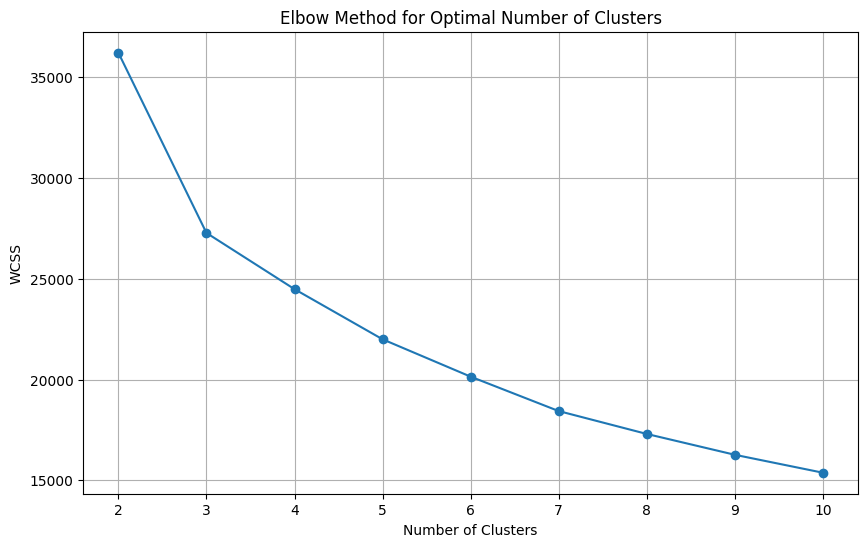

In [38]:
# Plot the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.grid(True)
plt.show()

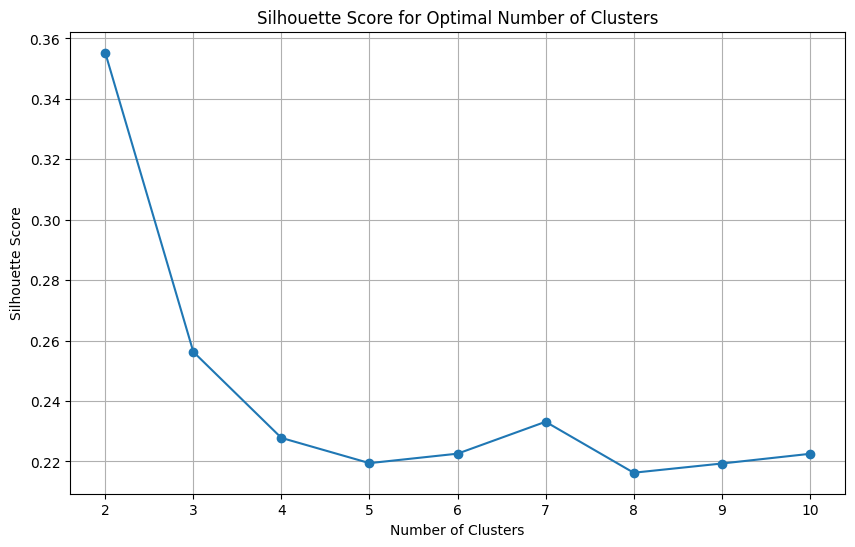

In [39]:
# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal Number of Clusters')
plt.grid(True)
plt.show()

We can see that in the elbow analysis, elbow is at n = 3 <br>
Also in the Silhouette Score Analysis at n = 3, the score is 2nd highest. <br>
So, we can choose 3 clusters


In [40]:
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10, max_iter=100)
kmeans.fit(customer_data_pca)
customer_data_cleaned['cluster'] = kmeans.labels_
customer_data_pca['cluster'] = kmeans.labels_

In [41]:
cluster_counts = customer_data_cleaned['cluster'].value_counts().sort_index()
customer_data_cleaned.head(10)

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Unique_Products_Purchased,Total_Spend,Average_Transaction_Value,Average_Days_Between_Purchase,Favorite_Day,Favorite_Hour,Cancellation_Frequency,Cancellation_Rate,cluster
0,12346.0,325,2,0,1,0.0,0.0,0.0,1,10,1,0.5,1
1,12347.0,1,7,2458,103,4310.0,615.714286,2.0,1,14,0,0.0,1
2,12348.0,74,4,2332,21,1437.24,359.31,10.846154,3,19,0,0.0,0
3,12349.0,18,1,630,72,1457.55,1457.55,0.0,0,9,0,0.0,1
4,12350.0,309,1,196,16,294.4,294.4,0.0,2,16,0,0.0,1
5,12352.0,35,8,463,57,1265.41,158.17625,3.108434,1,14,1,0.125,1
6,12353.0,203,1,20,4,89.0,89.0,0.0,3,17,0,0.0,0
7,12354.0,231,1,530,58,1079.4,1079.4,0.0,3,13,0,0.0,0
8,12355.0,213,1,240,13,459.4,459.4,0.0,0,13,0,0.0,1
9,12356.0,22,3,1573,52,2487.43,829.143333,5.298246,1,9,0,0.0,1


In [42]:
cluster_0 = customer_data_pca[customer_data_pca['cluster'] == 0]
cluster_1 = customer_data_pca[customer_data_pca['cluster'] == 1]
cluster_2 = customer_data_pca[customer_data_pca['cluster'] == 2]

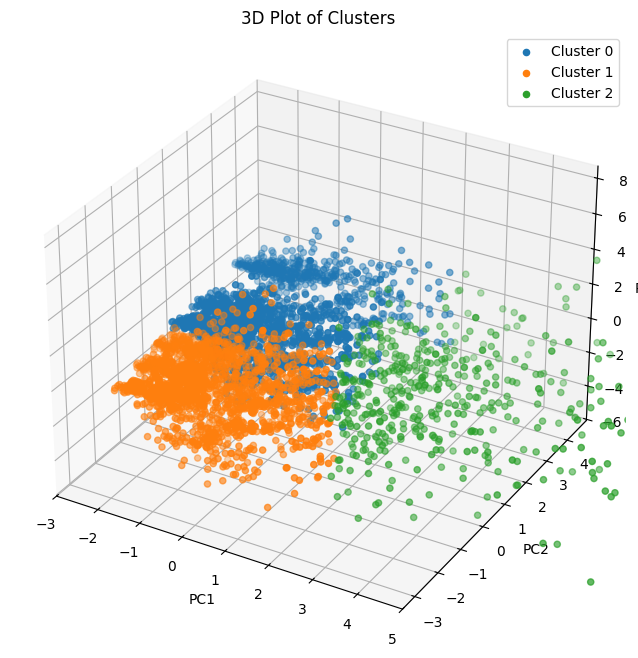

In [43]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(cluster_0['PC1'], cluster_0['PC2'], cluster_0['PC3'], label='Cluster 0')
ax.scatter(cluster_1['PC1'], cluster_1['PC2'], cluster_1['PC3'], label='Cluster 1')
ax.scatter(cluster_2['PC1'], cluster_2['PC2'], cluster_2['PC3'], label='Cluster 2')

ax.set_title('3D Plot of Clusters')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_xbound(-3,5)
#ax.set_zbound(-2,4)
ax.legend()
plt.show()


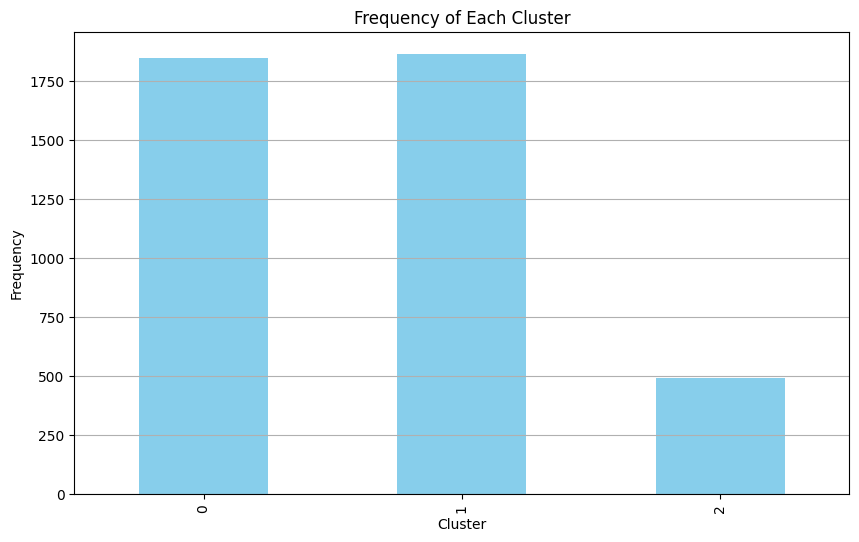

In [44]:
plt.figure(figsize=(10, 6))
cluster_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.title('Frequency of Each Cluster')
plt.grid(axis='y')

# Show the plot
plt.show()

In [45]:
from sklearn.metrics import calinski_harabasz_score,davies_bouldin_score

X = customer_data_pca.drop('cluster', axis=1)
clusters = customer_data_pca['cluster']

# Compute the metrics
sil_score = silhouette_score(X, clusters)
calinski_score = calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score(X, clusters)

print(f'Silhouette Score : {sil_score} \nCalinski Harabasz Score : {calinski_score} \nDavies Bouldin Score : {davies_score}')

Silhouette Score : 0.2562687060997407 
Calinski Harabasz Score : 1496.0896246978862 
Davies Bouldin Score : 1.304765548281703


In [46]:
final_data = customer_data_scaled.copy()
final_data['Favorite_Day'] = scaler.fit_transform(final_data[['Favorite_Day']])
final_data['cluster'] = customer_data_pca['cluster']

In [47]:
cluster_centroids = final_data.groupby('cluster').mean()

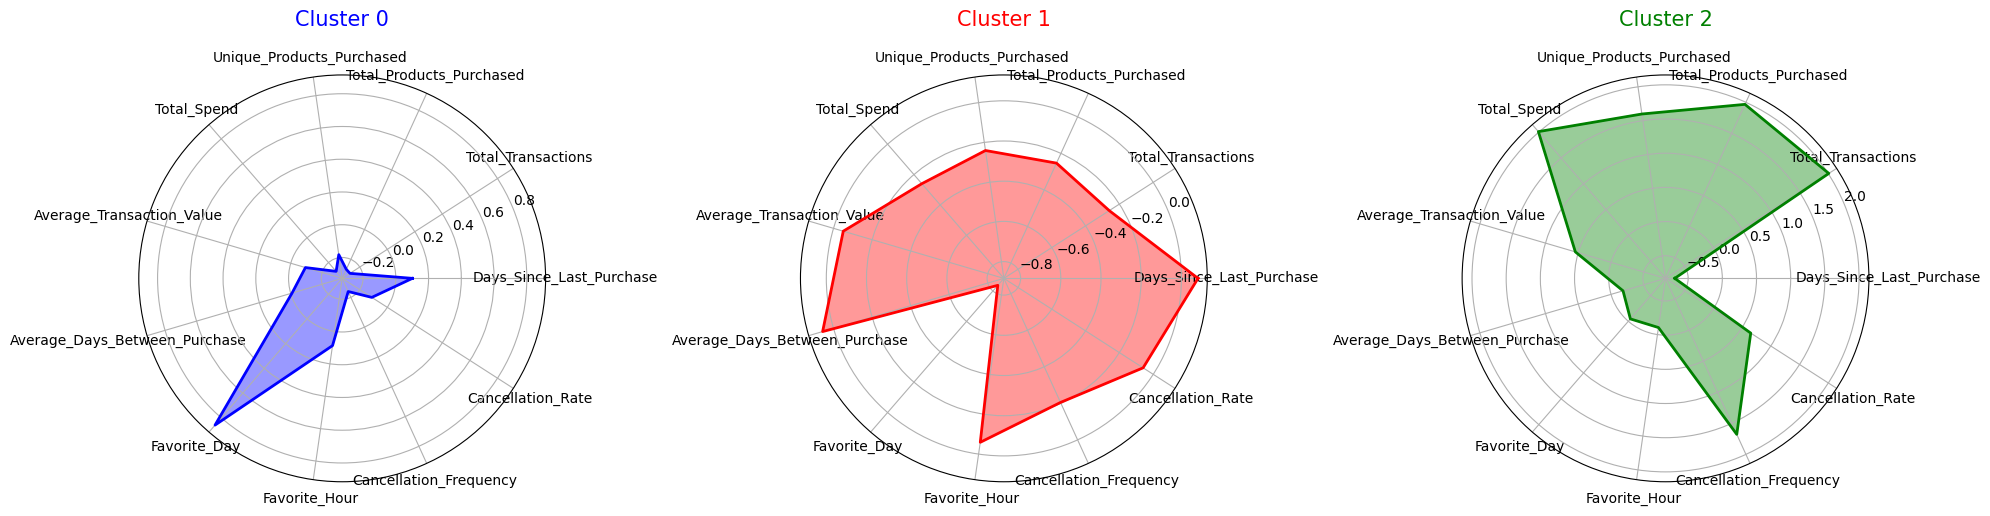

In [48]:
def create_radar_chart(ax, angles, data, color, cluster):
    ax.fill(angles, data, color=color, alpha=0.4)
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid')
    ax.set_title(f'Cluster {cluster}', size=15, color=color, y=1.1)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels[:-1])

labels = np.array(cluster_centroids.columns)
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]
labels = np.concatenate((labels, [labels[0]]))

fig, axes = plt.subplots(figsize=(20, 10), subplot_kw=dict(polar=True), nrows=1, ncols=len(cluster_centroids))

colors = ['b', 'r', 'g']

# Create radar chart for each cluster
for i, (ax, color) in enumerate(zip(axes, colors)):
    data = cluster_centroids.loc[i].tolist()
    data += data[:1]  # Complete the loop
    create_radar_chart(ax, angles, data, color, i)

# Display the plot
plt.tight_layout()
plt.show()

In [49]:
customer_data_cleaned.set_index('CustomerID')

,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Unique_Products_Purchased,Total_Spend,Average_Transaction_Value,Average_Days_Between_Purchase,Favorite_Day,Favorite_Hour,Cancellation_Frequency,Cancellation_Rate,cluster
CustomerID,,,,,,,,,,,,
12346.0,325,2,0,1,0.0,0.0,0.0,1,10,1,0.5,1
12347.0,1,7,2458,103,4310.0,615.714286,2.0,1,14,0,0.0,1
12348.0,74,4,2332,21,1437.24,359.31,10.846154,3,19,0,0.0,0
12349.0,18,1,630,72,1457.55,1457.55,0.0,0,9,0,0.0,1
12350.0,309,1,196,16,294.4,294.4,0.0,2,16,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,277,1,45,10,180.6,180.6,0.0,0,9,0,0.0,1
18281.0,180,1,54,7,80.82,80.82,0.0,6,10,0,0.0,0
18282.0,7,3,98,12,176.6,58.866667,9.833333,4,13,1,0.333333,0


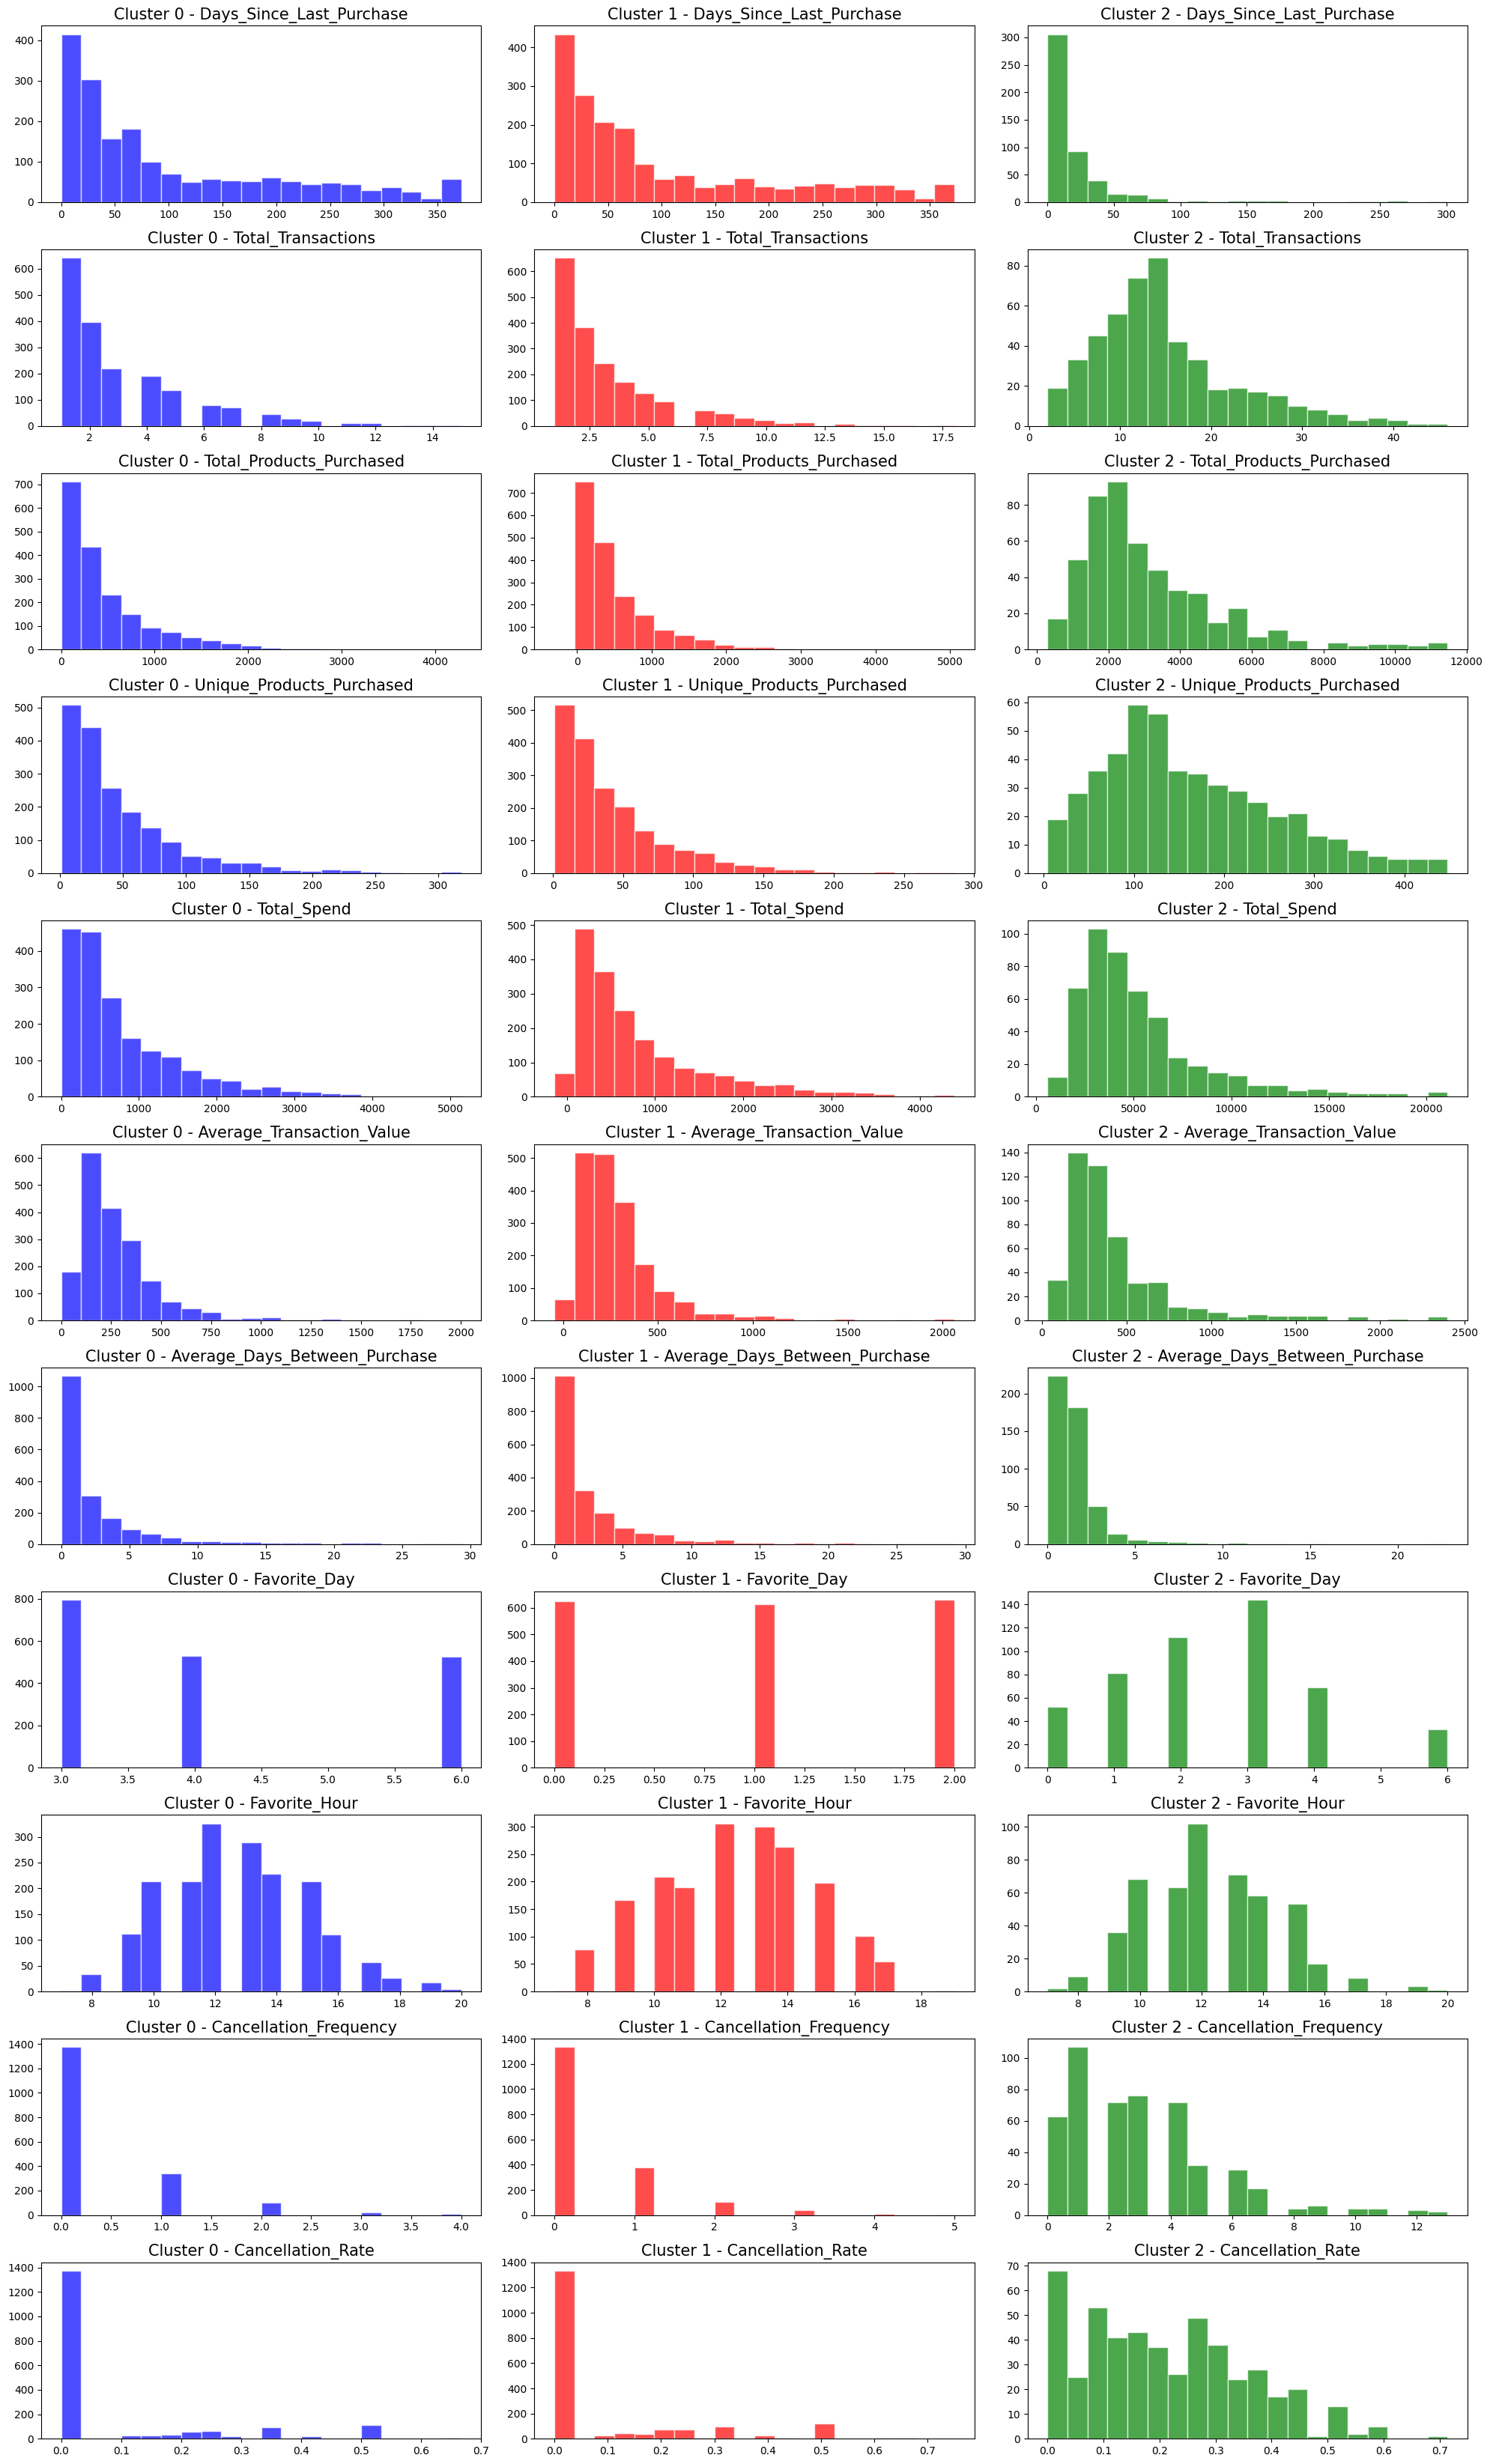

In [50]:
features = customer_data_cleaned.columns[1:-1]
clusters = customer_data_cleaned['cluster'].unique()
clusters.sort()

# Setting up the subplots
n_rows = len(features)
n_cols = len(clusters)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 3*n_rows))

# Plotting histograms
for i, feature in enumerate(features):
    for j, cluster in enumerate(clusters):
        data = customer_data_cleaned[customer_data_cleaned['cluster'] == cluster][feature]
        axes[i, j].hist(data, bins=20, color=colors[j], edgecolor='w', alpha=0.7)
        axes[i, j].set_title(f'Cluster {cluster} - {feature}', fontsize=15)
        axes[i, j].set_xlabel('')
        axes[i, j].set_ylabel('')

# Adjusting layout to prevent overlapping
plt.tight_layout()
plt.show()